<div style="position: relative; text-align: center; color: white; height: 300px;">
  <img src="images/portada_EDA.webp" alt="Logo del Proyecto" style="width: 100%; height: 100%; object-fit: cover; opacity: 0.7;">
  <div style="position: absolute; top: 50%; left: 50%; transform: translate(-50%, -50%);">
    <h1 style="font-size: 2.5em; background-color: rgba(0, 0, 0, 0.5); padding: 10px;">
      Simulador de Batallas de Superhéroes
    </h1>
    <h2 style="font-size: 1.5em; background-color: rgba(0, 0, 0, 0.5); padding: 5px;">
      Análisis Exploratorio de Datos: Desentrañando Patrones y Tendencias en Batallas de Superhéroes
    </h2>
  </div>
</div>


Bibliotecas

In [2]:
import ast
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import modulo_toolbox as mtb
import toolbox_ML as tb

from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel



## DATASET MCU VS DC

### Objetivos

**Principal**

Determinar las caracteristicas y factores clave que influyen en la victoria de un heroe en enfrentamientos, tanto en comics como en peliculas. 

**Secundarios** 
1. Analizar las diferencias en atributos (inteligencia, fuerza, durabilidad, poder y combate) entre los heroes ganadores y perdedores. 
2. Explorar como las caracteristicas del heroe (atributos y superpoderes) afectan a la probabilidad de ganar en comics y peliculas. 
3. Investigar si existen patrones o correlaciones significativas entre los atributos de los heroes y el resultado de sus enfrentamientos. 
4. Comparar las diferencias entre los resultados de enfrentamientos en comics y en peliculas 

### Cargar data y primeras visualizaciones

In [3]:
# Cargar Data_final_comics_peliculas
df_comics_pelis = pd.read_csv('./data/Data_final_MCU_vs_DC.csv')

In [4]:
df_comics_pelis.head()

,Heroe 1,Heroe 2,Resultado_Comics,Resultado_Peliculas,Resultado_Combinado,Universe_1,Intelligence_1,Strength_1,Speed_1,Durability_1,...,Universe_2,Intelligence_2,Strength_2,Speed_2,Durability_2,Power_2,Combat_2,Tier_2,Tier2_2,Superpowers_2
0,Envy,Ancient One,2,1,2,DC Extended Universe,65,65,65,40,...,Marvel Cinematic Universe,85,8,25,25,90,100,4,NaN,"['Anti-Gravity', 'Astral Projection', 'Dimensi..."
1,Warlock,Ancient One,1,2,1,Marvel Cinematic Universe,45,50,25,35,...,Marvel Cinematic Universe,85,8,25,25,90,100,4,NaN,"['Anti-Gravity', 'Astral Projection', 'Dimensi..."
2,Deadshot,Ancient One,2,1,2,DC Extended Universe,60,1,6,7,...,Marvel Cinematic Universe,85,8,25,25,90,100,4,NaN,"['Anti-Gravity', 'Astral Projection', 'Dimensi..."
3,Doctor Fate,Ancient One,1,2,1,DC Extended Universe,85,75,60,45,...,Marvel Cinematic Universe,85,8,25,25,90,100,4,NaN,"['Anti-Gravity', 'Astral Projection', 'Dimensi..."
4,Cull Obsidian,Ancient One,1,2,1,Marvel Cinematic Universe,60,75,20,40,...,Marvel Cinematic Universe,85,8,25,25,90,100,4,NaN,"['Anti-Gravity', 'Astral Projection', 'Dimensi..."


In [5]:
df_comics_pelis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48319 entries, 0 to 48318
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Heroe 1              48319 non-null  object
 1   Heroe 2              48319 non-null  object
 2   Resultado_Comics     48319 non-null  int64 
 3   Resultado_Peliculas  48319 non-null  int64 
 4   Resultado_Combinado  48319 non-null  int64 
 5   Universe_1           48319 non-null  object
 6   Intelligence_1       48319 non-null  int64 
 7   Strength_1           48319 non-null  int64 
 8   Speed_1              48319 non-null  object
 9   Durability_1         48319 non-null  int64 
 10  Power_1              48319 non-null  int64 
 11  Combat_1             48319 non-null  int64 
 12  Tier_1               48319 non-null  int64 
 13  Tier2_1              10640 non-null  object
 14  Superpowers_1        48319 non-null  object
 15  Universe_2           48319 non-null  object
 16  Inte

In [6]:
df_comics_pelis.value_counts()

Heroe 1                    Heroe 2                      Resultado_Comics  Resultado_Peliculas  Resultado_Combinado  Universe_1                 Intelligence_1  Strength_1  Speed_1  Durability_1  Power_1  Combat_1  Tier_1  Tier2_1  Superpowers_1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [7]:
df_comics_pelis.columns

Index(['Heroe 1', 'Heroe 2', 'Resultado_Comics', 'Resultado_Peliculas',
       'Resultado_Combinado', 'Universe_1', 'Intelligence_1', 'Strength_1',
       'Speed_1', 'Durability_1', 'Power_1', 'Combat_1', 'Tier_1', 'Tier2_1',
       'Superpowers_1', 'Universe_2', 'Intelligence_2', 'Strength_2',
       'Speed_2', 'Durability_2', 'Power_2', 'Combat_2', 'Tier_2', 'Tier2_2',
       'Superpowers_2'],
      dtype='object')

In [8]:
tb.describe_df(df_comics_pelis)

,Heroe 1,Heroe 2,Resultado_Comics,Resultado_Peliculas,Resultado_Combinado,Universe_1,Intelligence_1,Strength_1,Speed_1,Durability_1,...,Universe_2,Intelligence_2,Strength_2,Speed_2,Durability_2,Power_2,Combat_2,Tier_2,Tier2_2,Superpowers_2
Data type,object,object,int64,int64,int64,object,int64,int64,object,int64,...,object,int64,int64,object,int64,int64,int64,int64,object,object
Percent missing (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.01279,0.0
Unique values,223,223,2,3,3,2,16,24,26,24,...,2,16,24,45,24,25,20,8,15,223
Cardinality percent (%),0.461516,0.461516,0.004139,0.006209,0.006209,0.004139,0.033113,0.04967,0.053809,0.04967,...,0.004139,0.033113,0.04967,0.093131,0.04967,0.051739,0.041392,0.016557,0.031044,0.461516


In [9]:
df_comics_pelis.describe()

,Resultado_Comics,Resultado_Peliculas,Resultado_Combinado,Intelligence_1,Strength_1,Durability_1,Power_1,Combat_1,Tier_1,Intelligence_2,Strength_2,Durability_2,Power_2,Combat_2,Tier_2
count,48319.000000,48319.000000,48319.000000,48319.000000,48319.000000,48319.000000,48319.000000,48319.000000,48319.000000,48319.000000,48319.000000,48319.000000,48319.000000,48319.000000,48319.000000
mean,1.502763,1.497154,1.502597,67.650407,38.875618,28.741241,47.465986,65.143215,2.125975,67.641921,38.875142,28.741075,47.468967,65.178398,2.126700
std,0.499998,0.500080,0.500164,14.190056,34.751590,19.679246,27.999794,22.075246,1.411182,14.178471,34.773776,19.701326,28.020184,22.055457,1.412312
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,60.000000,6.000000,15.000000,20.000000,50.000000,1.000000,60.000000,6.000000,15.000000,20.000000,50.000000,1.000000
50%,2.000000,1.000000,2.000000,65.000000,25.000000,25.000000,45.000000,70.000000,2.000000,65.000000,25.000000,25.000000,45.000000,70.000000,2.000000
75%,2.000000,2.000000,2.000000,75.000000,70.000000,40.000000,70.000000,80.000000,3.000000,75.000000,70.000000,40.000000,70.000000,80.000000,3.000000
max,2.000000,2.000000,2.000000,100.000000,100.000000,100.000000,100.000000,100.000000,7.000000,100.000000,100.000000,100.000000,100.000000,100.000000,7.000000


### Limpieza datos y tratamiento nulos 

In [10]:
df_comics_pelis['Tier2_2'].value_counts()

Tier2_2
4      2175
3      1949
1+     1075
1++     874
4+      871
1       650
7+      648
6++     435
4++     435
3+      431
5       217
0       217
0++     216
2       216
2++     215
Name: count, dtype: int64

In [11]:
# Tratamiento nulos
df_comics_pelis['Tier2_1'] = df_comics_pelis['Tier2_1'].fillna(0)
df_comics_pelis['Tier2_2'] = df_comics_pelis['Tier2_2'].fillna(0)

In [12]:
df_comics_pelis['Speed_2'].value_counts()

Speed_2
25     11082
25      3861
6       2830
20      2173
50      2165
1       1951
8       1526
11      1509
100     1304
6       1300
30      1295
1       1080
7       1075
8       1071
50       873
20       873
85       872
14       869
14       858
75       652
7        651
30       647
17       646
17       644
65       440
35       439
100      436
60       434
65       434
11       433
60       433
19       432
35       432
80       219
19       219
45       218
∞        218
0        218
10       217
70       217
13       216
80       215
15       214
0        214
15       214
Name: count, dtype: int64

In [13]:
# Transformacion columnas numericas de object a int
columns_to_convert = ['Speed_1', 'Speed_2', 'Tier2_1', 'Tier2_2'] 
df_comics_pelis[columns_to_convert] = df_comics_pelis[columns_to_convert].apply(pd.to_numeric, errors = 'coerce').fillna(0).astype(int)

In [14]:
df_comics_pelis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48319 entries, 0 to 48318
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Heroe 1              48319 non-null  object
 1   Heroe 2              48319 non-null  object
 2   Resultado_Comics     48319 non-null  int64 
 3   Resultado_Peliculas  48319 non-null  int64 
 4   Resultado_Combinado  48319 non-null  int64 
 5   Universe_1           48319 non-null  object
 6   Intelligence_1       48319 non-null  int64 
 7   Strength_1           48319 non-null  int64 
 8   Speed_1              48319 non-null  int32 
 9   Durability_1         48319 non-null  int64 
 10  Power_1              48319 non-null  int64 
 11  Combat_1             48319 non-null  int64 
 12  Tier_1               48319 non-null  int64 
 13  Tier2_1              48319 non-null  int32 
 14  Superpowers_1        48319 non-null  object
 15  Universe_2           48319 non-null  object
 16  Inte

Tratamientos columnas Superpowers. Limpieza 

In [15]:
df_comics_pelis['Superpowers_1'].value_counts()

Superpowers_1
['Agility', 'Durability', 'Intangibility', 'Intelligence', 'Stamina', 'Super Speed', 'Super Strength', 'Toxin and Disease Resistance', 'Changing Armor', 'Cold Resistance', 'Density Control', 'Dexterity', 'Electricity Resistance', 'Endurance', 'Energy Beams', 'Energy Blasts', 'Energy Resistance', 'Enhanced Memory', 'Fire Resistance', 'Flight', 'Hacking', 'Heat Generation', 'Heat Resistance', 'Invulnerability', 'Jump', 'Longevity', 'Marksmanship', 'Master Martial Artist', 'Phasing', 'Radiation Immunity', 'Reflexes', 'Self-Sustenance', 'Stealth', 'Technopath/Cyberpath', 'Transformation', 'Acrobatics', 'Adaptation', 'Master Tactician', 'Shapeshifting', 'Marvel Comics', 'MCU - Marvel Cinematic Universe', 'Chronicler', 'Ahasan', 'Rotemeg', 'BlotskyA', 'yes', 'MoNsTeR', 'Unnamed_User', 'Juzo', 'Rez005', 'Aleazlllll', 'All Users']                                                                                                                                                        

In [16]:
# Función para obtener el conteo de superpoderes
def get_superpower_counts(df, column):
    superpowers = df[column].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
    all_superpowers = superpowers.explode()
    superpowers_counts = all_superpowers.value_counts()
    return superpowers_counts

# Obtener el conteo de superpoderes para Superpowers_1
superpowers_1_counts = get_superpower_counts(df_comics_pelis, 'Superpowers_1')

# Mostrar los resultados
print(superpowers_1_counts.head(20))


Superpowers_1
Rez005                             48319
All Users                          48319
Rotemeg                            48319
Chronicler                         48319
MoNsTeR                            48319
Ahasan                             48319
Aleazlllll                         48319
BlotskyA                           45954
yes                                45270
Ezio                               42475
Juzo                               40984
Stamina                            38564
Reflexes                           37934
Agility                            37912
TheReinhard                        36637
Endurance                          33575
MCU - Marvel Cinematic Universe    32728
Marvel Comics                      32728
Weapons Master                     29676
Intelligence                       29045
Name: count, dtype: int64


In [17]:
# Función para obtener el conteo de superpoderes
def get_superpower_counts(df, column):
    superpowers = df[column].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
    all_superpowers = superpowers.explode()
    superpowers_counts = all_superpowers.value_counts()
    return superpowers_counts

# Obtener el conteo de superpoderes para Superpowers_1
superpowers_2_counts = get_superpower_counts(df_comics_pelis, 'Superpowers_2')

# Mostrar los resultados
print(superpowers_2_counts.head(20))


Superpowers_2
Rez005                             48319
All Users                          48319
Rotemeg                            48319
Chronicler                         48319
MoNsTeR                            48319
Aleazlllll                         48319
Ahasan                             48319
BlotskyA                           45927
yes                                45286
Ezio                               42485
Juzo                               40962
Stamina                            38557
Reflexes                           37924
Agility                            37899
TheReinhard                        36619
Endurance                          33580
MCU - Marvel Cinematic Universe    32710
Marvel Comics                      32710
Weapons Master                     29686
Intelligence                       29048
Name: count, dtype: int64


In [18]:
# Filtrar los superpoderes no válidos 
invalid_superpowers = ['Rez005', 'All Users', 'Rotemeg', 'Chronicler', 'MoNsTeR', 'Ahasan', 'Aleazlllll', 'BlotskyA', 'yes', 'Ezio', 'Juzo', 'TheReinhard', 'MCU - Marvel Cinematic Universe', 
                    'Marvel Comics', 'DC Comics', 'DCEU - DC Extended Universe', 'Spider-man: No Way Home (2021)', 'Kang the Conqueror', 'Cheetah', 'S.W.O.R.D.', 'red skull', 
                    'Dark Matter Manipulation', 'Malekith', 'Lust', 'Agatha Harkness', 'EMP Generation', 'Cyborgization', 'Zeus', 'General Zod', 'Man Of Steel (2013)', 'Thena', 
                    'The Fourth Wall', 'Harley Quinn', 'Anti-heroes', 'Lantern Power Ring', 'Green Lantern', 'Wasp', 'Hulk', 'The Incredible Hulk (2008)', 'Existence Erasure Resistance','Hawkeye', 
                    'Loki', 'Jessica Jones', 'Ronin', 'Leviathan', 'Ebony Maw', 'Fandral', 'Sub-Mariner', 'Bionics', 'Gamora', 'black manta', 'Yondu', 'Supergirl', 'Mandarin', 'gilgamesh', 'Superman', 
                    'Supermen/women', 'Red Guardian', 'Jaw Strength', 'Avengers: Endgame (2019)', 'My Collection', 'Doctor Strange In The Multiverse Of Madness (2022)', 'Star-Lord',
                    'Avengers: Infinity War (2018)', "Mcu Spider-man's Friends And Allies", 'Batman V Superman: Dawn Of Justice (2016)', 'Movie Heroes', 'The Flash Series Speedsters',
                    'Zack Snyder’s Justice League (2021)', 'Bullseye','My Favorite Characters ⭐ Pcf Updated', 'Hela', "All The Characters I've Edited", 'Thor: Ragnarok (2017) 🔨🌩', 
                    'Revengers', 'Valkyrie', 'A-force (mcu)', 'Ghost Rider', 'Doomsday', 'Master Survivor', 'Punisher', 'Avengers', 'Falcon', 'Avengers: Age Of Ultron (2015)',
                    'Captain America: Winter Soldier (2014)', 'Thor: The Dark World (2013)', 'Dormammu', 'Godly(green) Ranked Characters', 'Ares', '#shdb - Horde Characters', 'Black Bolt', 
                    'Guardians of the Galaxy', 'Groot', 'Surtur', 'Thanos', 'Enderman Endy Villain That Make Endy Fight The True Villain', 'Luke Cage', 'Mysterio','Spider-man: No Way Home (2021)', 
                    'Kang the Conqueror', 'Malekith', 'Agatha Harkness', 'Zeus','General Zod', 'Man Of Steel (2013)', 'Thena', 'The Fourth Wall', 'Harley Quinn', 'Wasp', 'Hulk', 
                    'The Incredible Hulk (2008)', 'Hawkeye','Loki', 'Jessica Jones', 'Ronin', 'Leviathan', 'Ebony Maw', 'Fandral', 'Gamora','black manta', 'Yondu', 'Supergirl', 'Mandarin',
                    'gilgamesh', 'Superman', 'Supermen/women', 'Red Guardian', 'Fenris', 'Sif', 'Ironheart', 'White Wolf', 'Iron Man', 'Iron Man Live Action Armors', 'Korg', 'Philippus', 'Nomad',
                    'Mister Zsasz', 'Baron Mordo', 'Winter Soldier', 'Mantis','Taskmaster', 'The Hand', 'Elektra', 'Quake', 'Mera', 'Odin Force', 'Thor', 'Moon Knight', 'El Diablo', 'Captain Boomerang',
                    'Namor','King Shark', 'Quicksilver','Hippolyta', 'Hawkman', 'Favorite Characters (blotsky)','Favorite Characters (supremedreams)', 'Darkseid', 'Stature', 'Spider-Man', 'Jor-El', 
                    'Odin', 'Doctor Sivana', 'Cyborg', 'Kingpin', 'Which Is Best Kingpin Design', 'Black Adam', 'Baron Zemo', 'Mcu Thunderbolts', 'Aquaman', 'Captain Marvel', 'Cyclone', 'Black Mask', 
                    'Huntress', 'Echo', 'Captain America', 'Smartest Marvel Characters','Doctor Strange', 'War Machine', 'Joker', 'Crossbones', 'Nick Fury', 'Iron Spider', 
                    'Characters Who Can Solo Five Night At Freddy', 'Columbia Pictures Marvel And Dark Horse Movie Heroes', 'She-Hulk', 'Shazam Family', 'Shazam', 'Proxima Midnight', 'Killian', 
                    'Black Widow', 'People Who Like Each Other:', 'Rescue', 'Ghost', 'Daredevil', 'vigilante', 'Vulture', 'Ms. Marvel', 'Faora', 'Wrath', 'Favorite Characters (mrjaeger07)', 
                    'Favorite Characters (spectral_supernova)', 'Ultron', 'Wong', 'Ant-Man', 'Killer Croc','Abomination', 'Separation', 'Iron Monger', 'Katana', 'Lex Luthor', 'Vision', 'Rick Flag', 
                    'Rocket Raccoon', 'Batman', 'Batman: Arkham Knight (2015)', 'Scarlet Witch', 'Nebula', 'Shang-Chi', 'Ancient One', 'Team America', 'Black Panther', 'Tentacles','Corvus Glaive', 
                    'Singing', 'Black Canary', 'Mcu Superheroes', 'NorbertFox', 'Unnamed_User', 'Suicide Squad', 'Deadshot', 'My Dceu Batman Trilogy', 'Roleplaying Collection', 'Aura', 'Flash Family', 
                    'Flash', 'Danmaku', 'Heimdall', 'Atom Smasher', 'Killmonger', 'Giant-Man', 'Iron Fist', 'Incubus', 'Enchantress']

In [19]:
# Función para limpiar los superpoderes no válidos
def clean_superpowers(df, column, invalid_superpowers):
    superpowers = df[column].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
    cleaned_superpowers = superpowers.apply(lambda x: [power for power in x if power not in invalid_superpowers])
    df[column] = cleaned_superpowers.apply(str)
    return df

In [20]:
# Limpiar las columnas de superpoderes
df_comics_pelis = clean_superpowers(df_comics_pelis, 'Superpowers_1', invalid_superpowers)
df_comics_pelis = clean_superpowers(df_comics_pelis, 'Superpowers_2', invalid_superpowers)

print(df_comics_pelis[['Superpowers_1', 'Superpowers_2']].head(10))

                                       Superpowers_1  \
0  ['Accelerated Healing', 'Cold Resistance', 'Du...   
1  ['Durability', 'Energy Blasts', 'Enhanced Cond...   
2  ['Intelligence', 'Marksmanship', 'Peak Human C...   
3  ['Astral Projection', 'Cloth Manipulation', 'C...   
4  ['Cold Resistance', 'Durability', 'Endurance',...   
5  ['Accelerated Healing', 'Durability', 'Large S...   
6  ['Acid Resistants', 'Cold Resistance', 'Durabi...   
7  ['Cold Resistance', 'Disguise Mastery', 'Dupli...   
8  ['Accelerated Healing', 'Enhanced Thievery', '...   
9  ['Peak Human Condition', 'Stamina', 'Agility',...   

                                       Superpowers_2  
0  ['Anti-Gravity', 'Astral Projection', 'Dimensi...  
1  ['Anti-Gravity', 'Astral Projection', 'Dimensi...  
2  ['Anti-Gravity', 'Astral Projection', 'Dimensi...  
3  ['Anti-Gravity', 'Astral Projection', 'Dimensi...  
4  ['Anti-Gravity', 'Astral Projection', 'Dimensi...  
5  ['Anti-Gravity', 'Astral Projection', 'Dimensi... 

In [21]:
# Contar las cadenas únicas completas en Superpowers_1
unique_complete_lists = df_comics_pelis['Superpowers_1'].nunique()
print(f"Número de listas de superpoderes únicas en Superpowers_1: {unique_complete_lists}")

# Contar los superpoderes individuales únicos después de explotar las listas
unique_individual_superpowers = df_comics_pelis['Superpowers_1'].apply(ast.literal_eval).explode().nunique()
print(f"Número de superpoderes individuales únicos en Superpowers_1: {unique_individual_superpowers}")


Número de listas de superpoderes únicas en Superpowers_1: 221
Número de superpoderes individuales únicos en Superpowers_1: 364


In [22]:
# Contar las cadenas únicas completas en Superpowers_1
unique_complete_lists = df_comics_pelis['Superpowers_2'].nunique()
print(f"Número de listas de superpoderes únicas en Superpowers_2: {unique_complete_lists}")

# Contar los superpoderes individuales únicos después de explotar las listas
unique_individual_superpowers = df_comics_pelis['Superpowers_2'].apply(ast.literal_eval).explode().nunique()
print(f"Número de superpoderes individuales únicos en Superpowers_2: {unique_individual_superpowers}")


Número de listas de superpoderes únicas en Superpowers_2: 221
Número de superpoderes individuales únicos en Superpowers_2: 364


In [23]:
df_comics_pelis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48319 entries, 0 to 48318
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Heroe 1              48319 non-null  object
 1   Heroe 2              48319 non-null  object
 2   Resultado_Comics     48319 non-null  int64 
 3   Resultado_Peliculas  48319 non-null  int64 
 4   Resultado_Combinado  48319 non-null  int64 
 5   Universe_1           48319 non-null  object
 6   Intelligence_1       48319 non-null  int64 
 7   Strength_1           48319 non-null  int64 
 8   Speed_1              48319 non-null  int32 
 9   Durability_1         48319 non-null  int64 
 10  Power_1              48319 non-null  int64 
 11  Combat_1             48319 non-null  int64 
 12  Tier_1               48319 non-null  int64 
 13  Tier2_1              48319 non-null  int32 
 14  Superpowers_1        48319 non-null  object
 15  Universe_2           48319 non-null  object
 16  Inte

In [24]:
# Guardar data limpio para ML
df_comics_pelis.to_csv('./data/MCU_DC_final_limpio.csv', index = False)

Separar variables categoricas, numericas y targets

In [25]:
cat_var = ['Heroe 1', 'Universe_1', 'Superpowers_1', 'Heroe 2', 'Universe_2', 'Superpowers_2']
num_var = ['Intelligence_1', 'Intelligence_2','Strength_1', 'Strength_2', 'Speed_1', 'Speed_2','Durability_1', 'Durability_2', 'Power_1', 'Power_2','Combat_1', 'Combat_2','Tier_1', 'Tier_2', 
           'Tier2_1', 'Tier2_2']

target_1 = 'Resultado_Combinado'
target_2 = 'Resultado_Peliculas'
target_3 = 'Resultado_Comics'

### ANALISIS

Target

In [26]:
# Análisis descriptivo de los targets
targets = [target_1, target_2, target_3]
targets_descriptive_stats = df_comics_pelis[targets].describe(include='all')
targets_descriptive_stats

,Resultado_Combinado,Resultado_Peliculas,Resultado_Comics
count,48319.000000,48319.000000,48319.000000
mean,1.502597,1.497154,1.502763
std,0.500164,0.500080,0.499998
min,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,1.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000


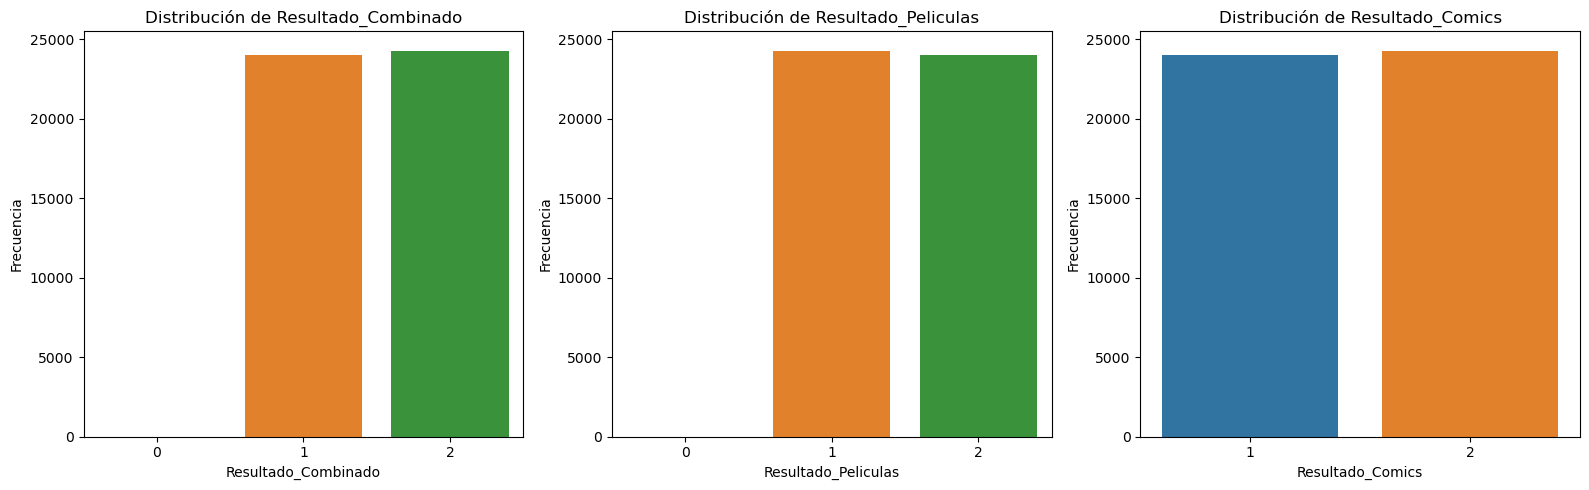

In [27]:
plt.figure(figsize=(16, 5))

for i, target in enumerate(targets, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=df_comics_pelis[target])
    plt.title(f'Distribución de {target}')
    plt.xlabel(target)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Resultado_Combinado:

Media: **1.5026**

Desviación estándar: **0.5002**

Valores: **0 a 2**

Resultado_Peliculas:

Media: **1.4972**

Desviación estándar: **0.5001**

Valores: **0 a 2**

Resultado_Comics:

Media: **1.5028**
Desviación estándar: **0.5000**
Valores: **1 a 2**

La **media de 1.5** indica una distribución equitativa entre los resultados de los cómics de 1 y 2.
La **desviación estándar baja**, muestra que los valores están cercanos a la media, lo que implica que no hay mucha variabilidad.

Conclusión

Los tres resultados muestran una distribución casi uniforme, lo que sugiere que no hay un sesgo significativo hacia un resultado en particular.
La media y la baja desviación estándar de los tres resultados indican que los enfrentamientos tienden a estar balanceados, con valores que no se desvían mucho del centro.


#### Univariante

Numericas

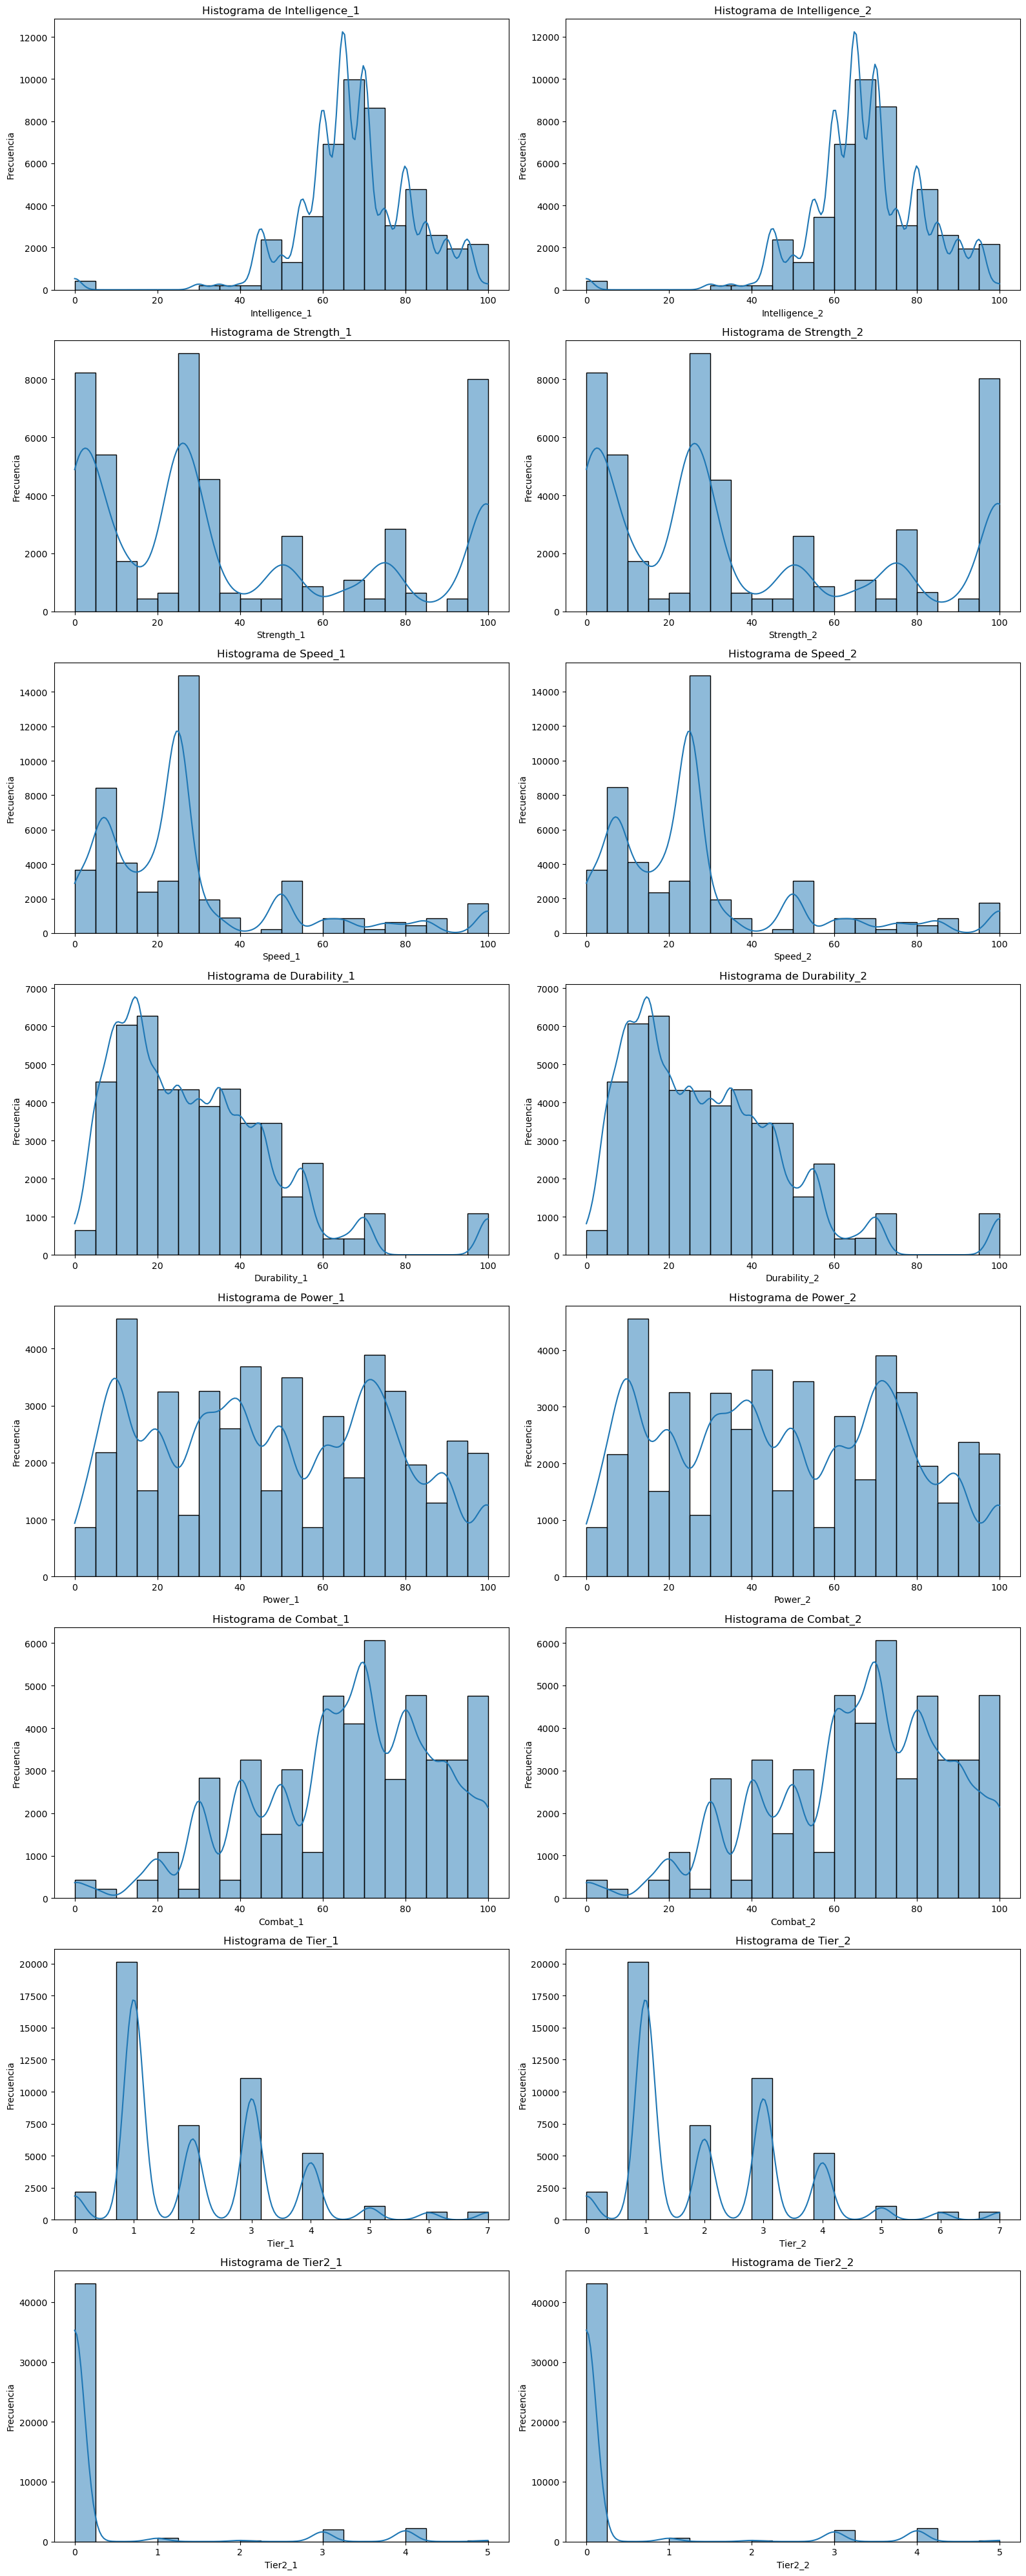

In [28]:
# Definir las variables numéricas
num_var = [
    'Intelligence_1', 'Intelligence_2', 'Strength_1', 'Strength_2', 
    'Speed_1', 'Speed_2', 'Durability_1', 'Durability_2', 
    'Power_1', 'Power_2', 'Combat_1', 'Combat_2', 
    'Tier_1', 'Tier_2', 'Tier2_1', 'Tier2_2'
]

# Transformación de columnas numéricas de object a int (si es necesario)
# columns_to_convert = ['Speed_1', 'Speed_2', 'Tier2_1', 'Tier2_2']
# df_comics_pelis[columns_to_convert] = df_comics_pelis[columns_to_convert].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

# Número de gráficos por fila
num_plots = len(num_var)
num_cols = 2
num_rows = num_plots // num_cols

# Visualizar la distribución de las variables numéricas usando histogramas con KDE
plt.figure(figsize=(16, 5 * num_rows))

for i, column in enumerate(num_var, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df_comics_pelis[column], bins=20, kde=True)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

**Intelligence_1 vs Intelligence_2**:

Distribución ligeramente sesgada hacia la derecha.
La mayoría de los valores están concentrados entre 50 y 80, con un pico alrededor de 60.

**Strength_1 vs Strength_2**:

Distribuciones bimodales con picos significativos alrededor de 0-10 y 60-80.
Hay un notable número de héroes con valores de fuerza bajos y otro grupo con valores altos (alrededor de 80-100).

**Speed_1 vs Speed_2**:

Distribuciones con un pico significativo alrededor de 25.
La mayoría de los héroes tienen valores de velocidad bajos, con algunos valores extremos hasta 100.

**Durability_1 vs Durability_2**:

Distribuciones con un pico alrededor de 25.
Los valores de durabilidad están bastante distribuidos entre 0 y 50, con algunos valores extremos hasta 100.

**Power_1 vs Power_2**:

Distribuciones uniformes con algunos picos a lo largo del rango.
Los valores de poder están bien distribuidos entre 0 y 100.

**Combat_1 vs Combat_2**:

Distribuciones con un pico alrededor de 70.
Alta concentración de valores de combate entre 50 y 80.

**Tier_1 y Tier_2**:

Distribuciones concentradas en los valores más bajos (0 a 3).
Algunos valores extremos llegan hasta 7.

**Tier2_1 y Tier2_2**:

La mayoría de los valores están en 0.
Pocos valores se encuentran en 1 y superiores.

Conclusión

Las variables numéricas de ambos héroes (Heroe 1 y Heroe 2) presentan distribuciones muy similares en cada par de habilidades, lo que sugiere que los enfrentamientos entre héroes de DC y Marvel son equilibrados en términos de sus habilidades y características. Las distribuciones muestran picos en ciertos rangos de valores, indicando que hay grupos de héroes con habilidades muy similares, y algunos outliers que destacan por sus habilidades extremas.

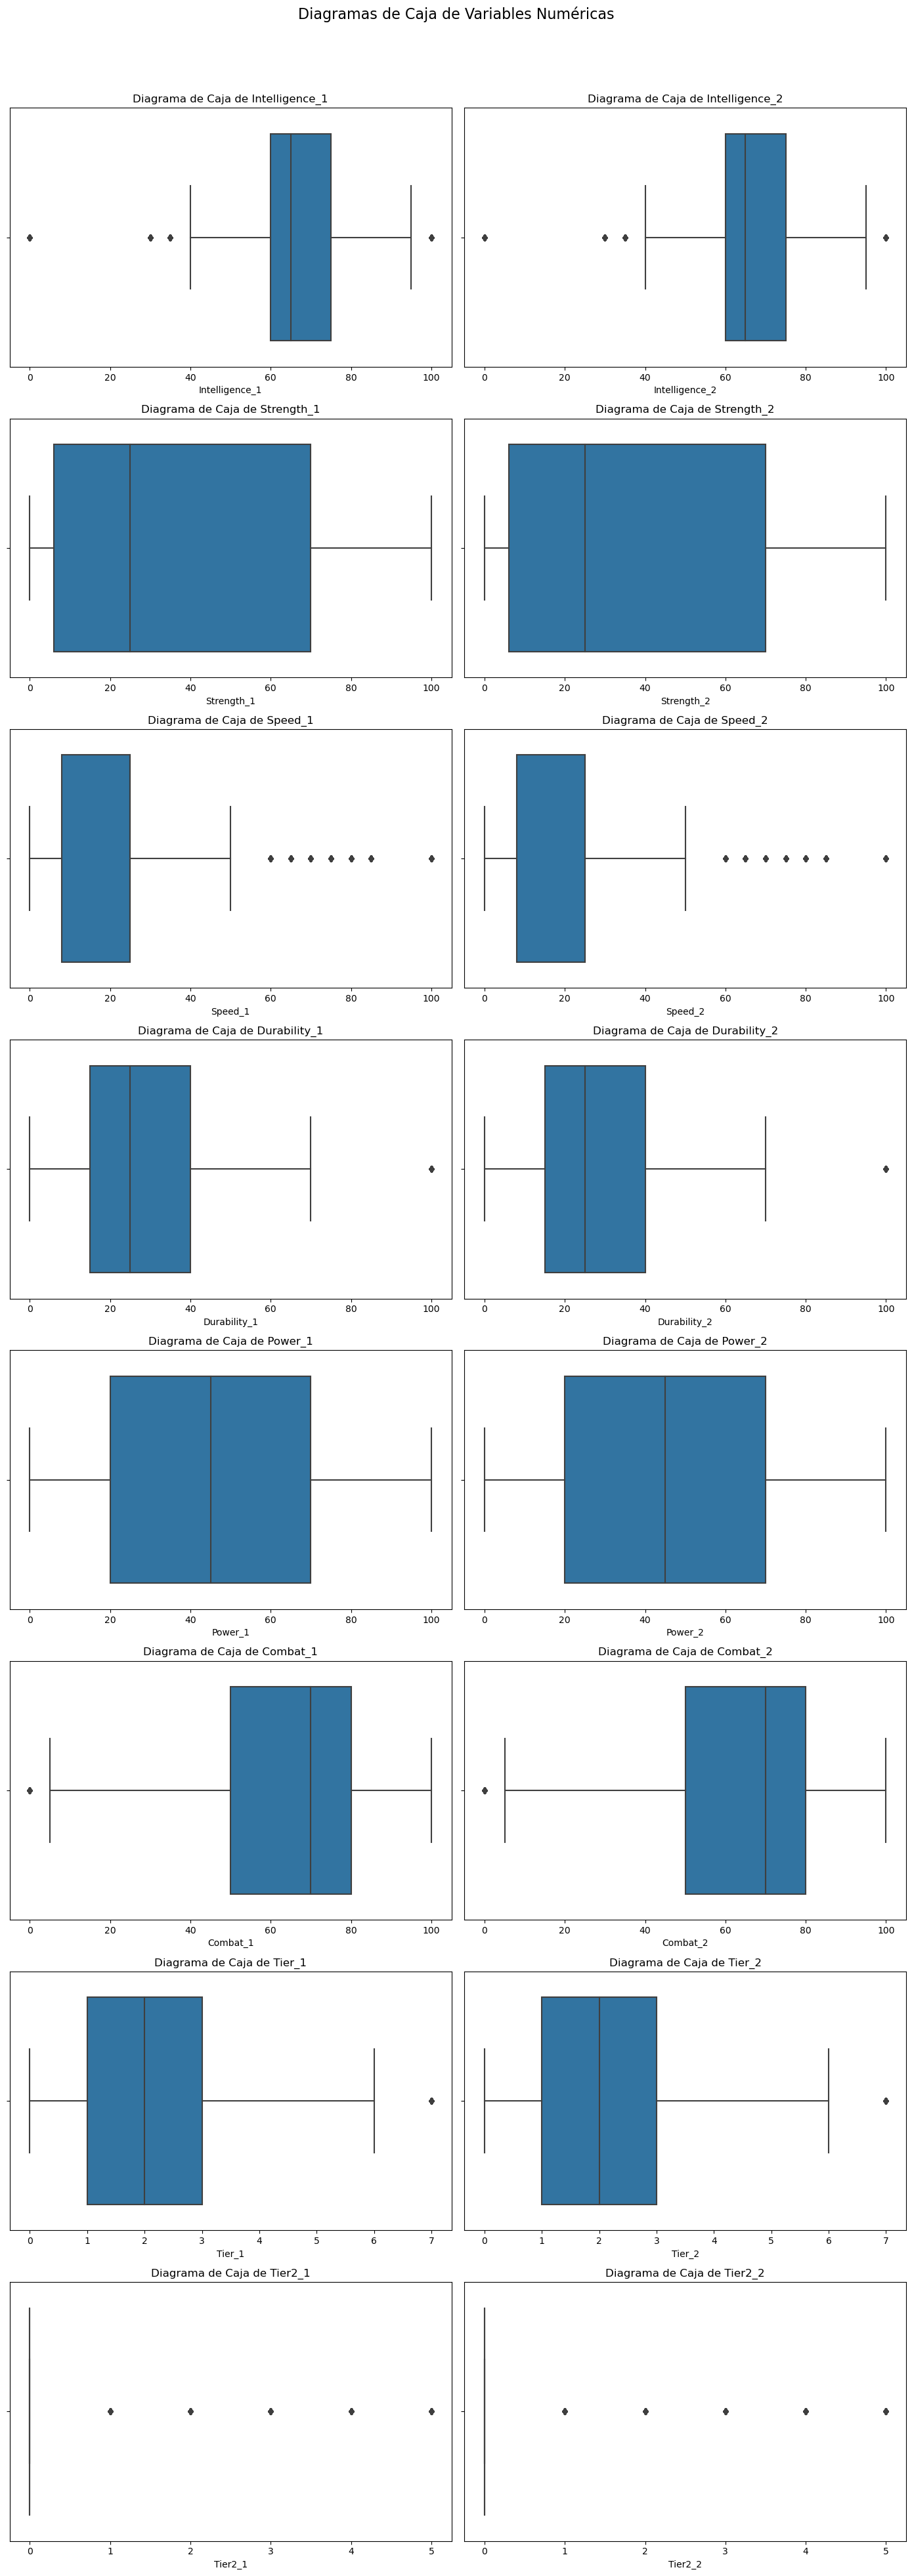

In [29]:
# Plot boxplots de las variables numéricas
fig, axes = plt.subplots(8, 2, figsize=(14, 40))
fig.suptitle('Diagramas de Caja de Variables Numéricas', fontsize=16)

for i, col in enumerate(num_var):
    sns.boxplot(x=df_comics_pelis[col], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Diagrama de Caja de {col}')
    axes[i//2, i%2].set_xlabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Conclusión

Outliers: Hay varios outliers en casi todas las variables, indicando la presencia de héroes con habilidades extremas en diferentes categorías.
Distribuciones: Las distribuciones de las habilidades muestran que la mayoría de los héroes tienen habilidades dentro de un rango medio, con algunas excepciones que se destacan por sus habilidades extremas.

Similitudes: Las distribuciones de las variables correspondientes a Heroe 1 y Heroe 2 son muy similares, lo que sugiere que los enfrentamientos están equilibrados en términos de las habilidades de los héroes.

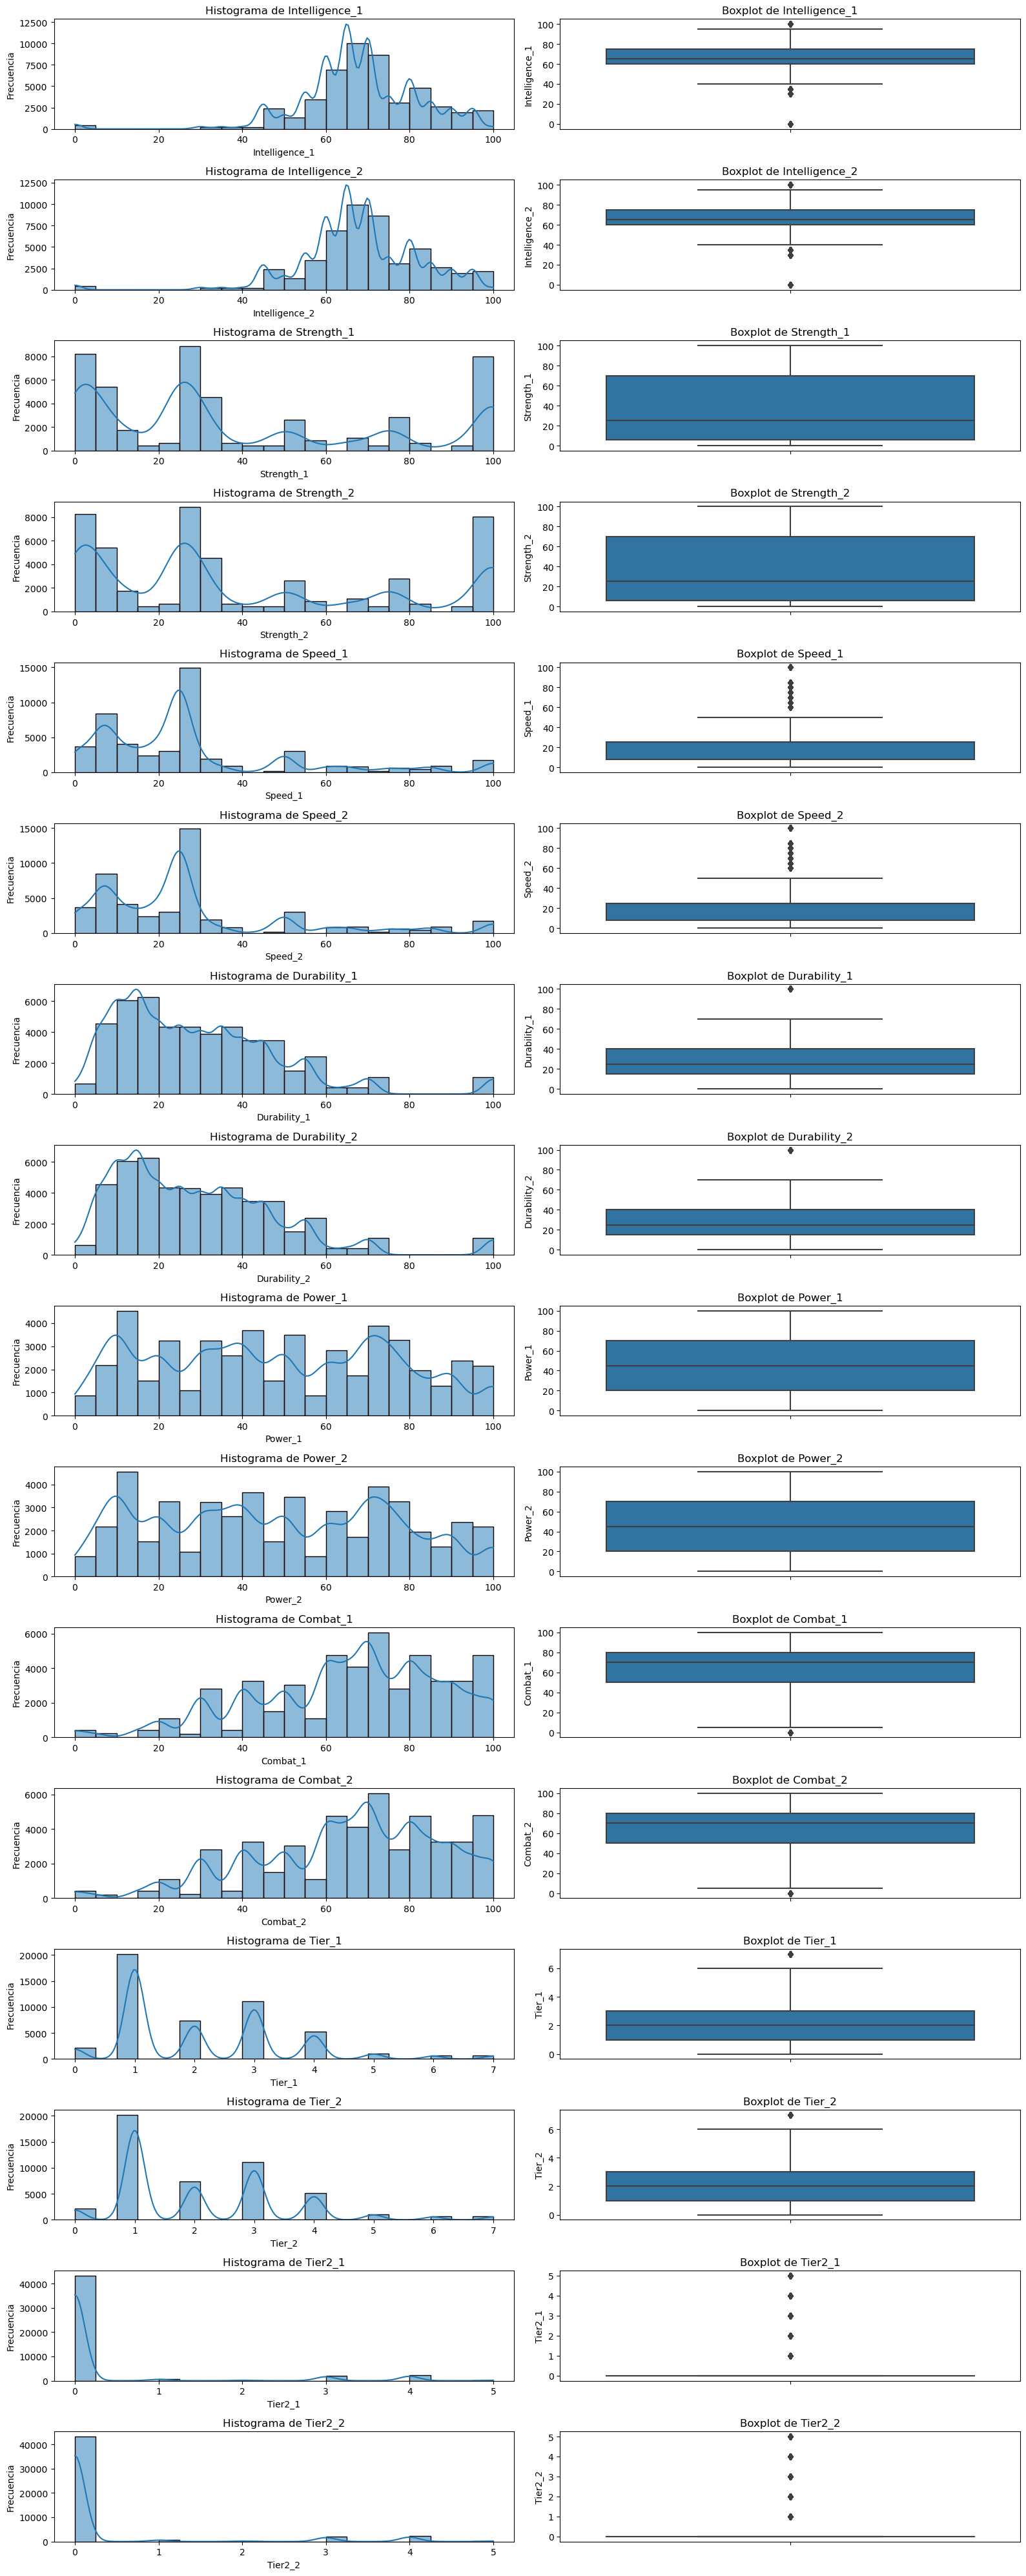

In [30]:
# Visualizar la distribución y outliers de las variables numéricas usando histogramas y boxplots

plt.figure(figsize=(16, 40))

for i, column in enumerate(num_var, 1):
    plt.subplot(len(num_var), 2, 2*i-1)
    sns.histplot(df_comics_pelis[column], bins=20, kde=True)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    
    plt.subplot(len(num_var), 2, 2*i)
    sns.boxplot(y=df_comics_pelis[column])
    plt.title(f'Boxplot de {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


OBSERVACIONES GENERALES 
Outliers: Las variables muestran una cantidad significativa de outliers, particularmente en Speed, Durability, y Tier2 indicando la presencia de héroes con habilidades extremadamente altas o bajas.
Distribuciones: Las distribuciones de las habilidades son consistentes entre Heroe 1 y Heroe 2, lo que sugiere que los enfrentamientos están equilibrados en términos de habilidades.


Categoricas

In [31]:
# Summarize value counts for categorical variables
for col in cat_var:
    print(f"Distribución de {col}:\n")
    print(df_comics_pelis[col].value_counts(), "\n")


Distribución de Heroe 1:

Heroe 1
Spectral Vision    222
Yondu              221
Dar-Benn           221
Hulk               221
Slipknot           221
                  ... 
Leo Fitz           212
Aquaman            212
Corvus Glaive      212
Joker              211
Namor              210
Name: count, Length: 223, dtype: int64 

Distribución de Universe_1:

Universe_1
Marvel Cinematic Universe    32728
DC Extended Universe         15591
Name: count, dtype: int64 

Distribución de Superpowers_1:

Superpowers_1
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

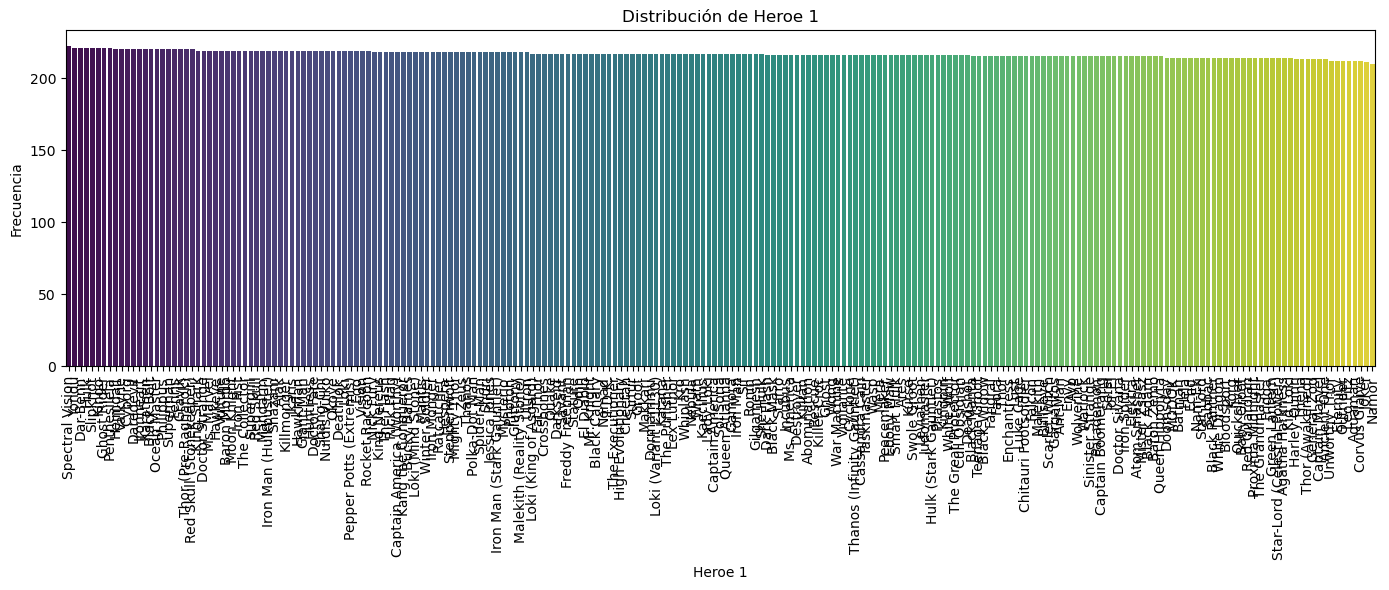

In [32]:
# Plot bar plot for 'Heroe 1'
plt.figure(figsize=(14, 6))
serie = df_comics_pelis['Heroe 1'].value_counts()
sns.barplot(x=serie.index, y=serie, palette='viridis')
plt.title('Distribución de Heroe 1')
plt.xlabel('Heroe 1')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [33]:
# Generar las series de valores contados
serie1 = df_comics_pelis['Universe_1'].value_counts()
serie2 = df_comics_pelis['Universe_2'].value_counts()

In [34]:
# Calcular los porcentajes
total1 = serie1.sum()
total2 = serie2.sum()
percentages1 = (serie1 / total1) * 100
percentages2 = (serie2 / total2) * 100

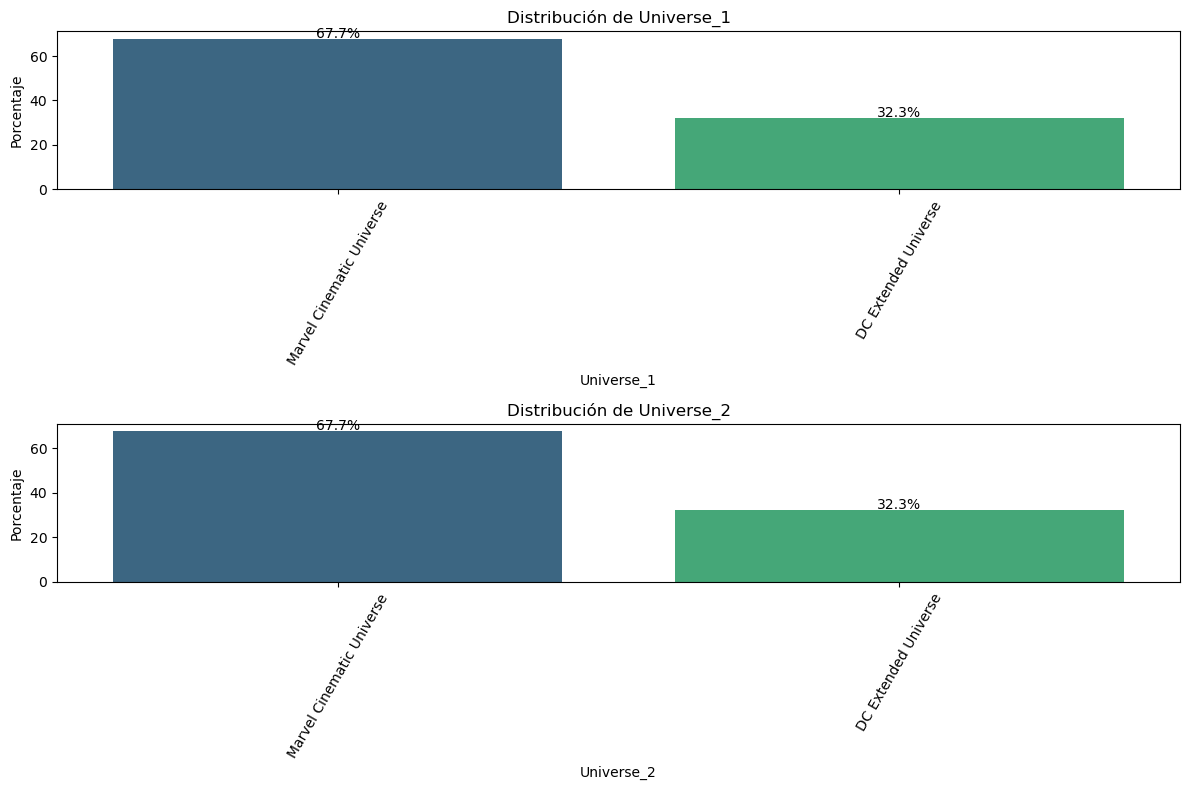

In [35]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))

# Gráfico para Universe_1
plt.subplot(2, 1, 1)
sns.barplot(x = percentages1.index, y = percentages1, palette = 'viridis')
plt.title('Distribución de Universe_1')
plt.xlabel('Universe_1')
plt.ylabel('Porcentaje')
plt.xticks(rotation=60)

# Añadir etiquetas de porcentaje encima de las barras
for index, value in enumerate(percentages1):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha = 'center')

# Gráfico para Universe_2
plt.subplot(2, 1, 2)
sns.barplot(x = percentages2.index, y = percentages2, palette = 'viridis')
plt.title('Distribución de Universe_2')
plt.xlabel('Universe_2')
plt.ylabel('Porcentaje')
plt.xticks(rotation=60)

# Añadir etiquetas de porcentaje encima de las barras
for index, value in enumerate(percentages2):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha = 'center')

plt.tight_layout()
plt.show()


### Hipotesis

Comparacion de atributos entre ganadores y perdedores

In [36]:
# Definir los atributos y las variables objetivo
atributos = ['Intelligence_1', 'Strength_1', 'Speed_1', 'Durability_1', 'Power_1', 'Combat_1',
             'Intelligence_2', 'Strength_2', 'Speed_2', 'Durability_2', 'Power_2', 'Combat_2']
targets_comics = 'Resultado_Comics'
targets_peliculas = 'Resultado_Peliculas'

In [37]:
# Separar los datos en ganadores y perdedores para cómics
ganadores_comics = df_comics_pelis[df_comics_pelis[targets_comics] == 1]
perdedores_comics = df_comics_pelis[df_comics_pelis[targets_comics] == 2]

In [38]:
# Separar los datos en ganadores y perdedores para películas
ganadores_peliculas = df_comics_pelis[df_comics_pelis[targets_peliculas] == 1]
perdedores_peliculas = df_comics_pelis[df_comics_pelis[targets_peliculas] == 2]

In [39]:
# Función para realizar el análisis
def analizar_atributos(ganadores, perdedores, atributos):
    resultados = {}
    for atributo in atributos:
        ganadores_atributo = ganadores[atributo].dropna()
        perdedores_atributo = perdedores[atributo].dropna()
        
        # Calcular estadísticas descriptivas
        mean_ganadores = ganadores_atributo.mean()
        mean_perdedores = perdedores_atributo.mean()
        std_ganadores = ganadores_atributo.std()
        std_perdedores = perdedores_atributo.std()
        
        # Prueba de hipótesis
        t_stat, p_val = ttest_ind(ganadores_atributo, perdedores_atributo, equal_var=False)
        
        resultados[atributo] = {
            'Media Ganadores': mean_ganadores,
            'Media Perdedores': mean_perdedores,
            'STD Ganadores': std_ganadores,
            'STD Perdedores': std_perdedores,
            'T-Statistic': t_stat,
            'P-Value': p_val
        }
    
    resultados_df = pd.DataFrame(resultados).T
    return resultados_df

In [40]:
# Analizar atributos para cómics
resultados_comics = analizar_atributos(ganadores_comics, perdedores_comics, atributos)
print("Resultados de Atributos en Cómics:")
print(resultados_comics)

Resultados de Atributos en Cómics:
                Media Ganadores  Media Perdedores  STD Ganadores  \
Intelligence_1        67.620911         67.679578      14.187772   
Strength_1            38.824732         38.925946      34.704333   
Speed_1               26.726796         26.764665      23.411118   
Durability_1          28.708774         28.773350      19.663233   
Power_1               47.425622         47.505907      27.981261   
Combat_1              65.131524         65.154777      22.059549   
Intelligence_2        67.596978         67.686371      14.216897   
Strength_2            38.800799         38.948668      34.723190   
Speed_2               26.730833         26.772362      23.455357   
Durability_2          28.708233         28.773556      19.695808   
Power_2               47.412969         47.524349      28.005490   
Combat_2              65.143178         65.213230      22.083662   

                STD Perdedores  T-Statistic   P-Value  
Intelligence_1       14.

In [41]:
# Analizar atributos para películas
resultados_peliculas = analizar_atributos(ganadores_peliculas, perdedores_peliculas, atributos)
print("\nResultados de Atributos en Películas:")
print(resultados_peliculas)


Resultados de Atributos en Películas:
                Media Ganadores  Media Perdedores  STD Ganadores  \
Intelligence_1        67.679578         67.619880      14.192546   
Strength_1            38.925946         38.823260      34.798906   
Speed_1               26.764665         26.725025      23.452186   
Durability_1          28.773350         28.708666      19.695423   
Power_1               47.505907         47.425408      28.018629   
Combat_1              65.154777         65.130911      22.091208   
Intelligence_2        67.686371         67.595946      14.140516   
Strength_2            38.948668         38.799326      34.824293   
Speed_2               26.772362         26.729063      23.462595   
Durability_2          28.773556         28.708125      19.707134   
Power_2               47.524349         47.412754      28.035175   
Combat_2              65.213230         65.142566      22.027926   

                STD Perdedores  T-Statistic   P-Value  
Intelligence_1      

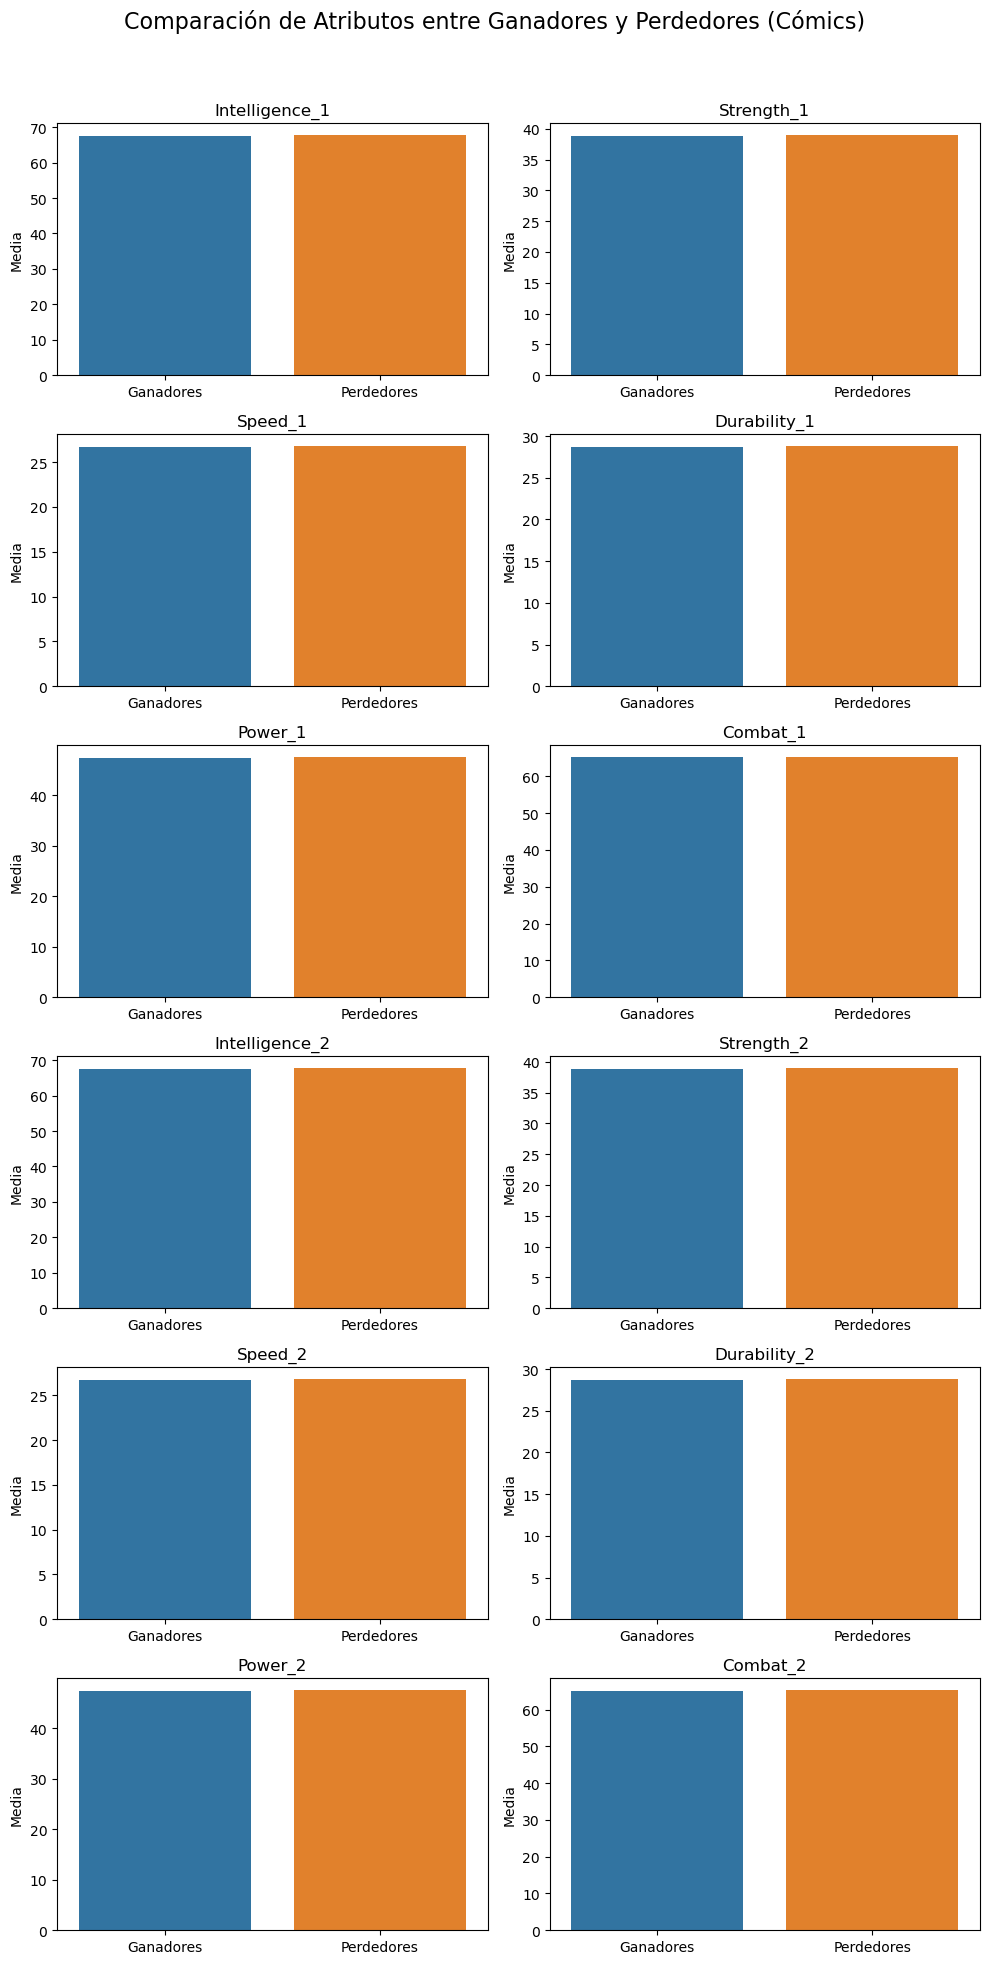

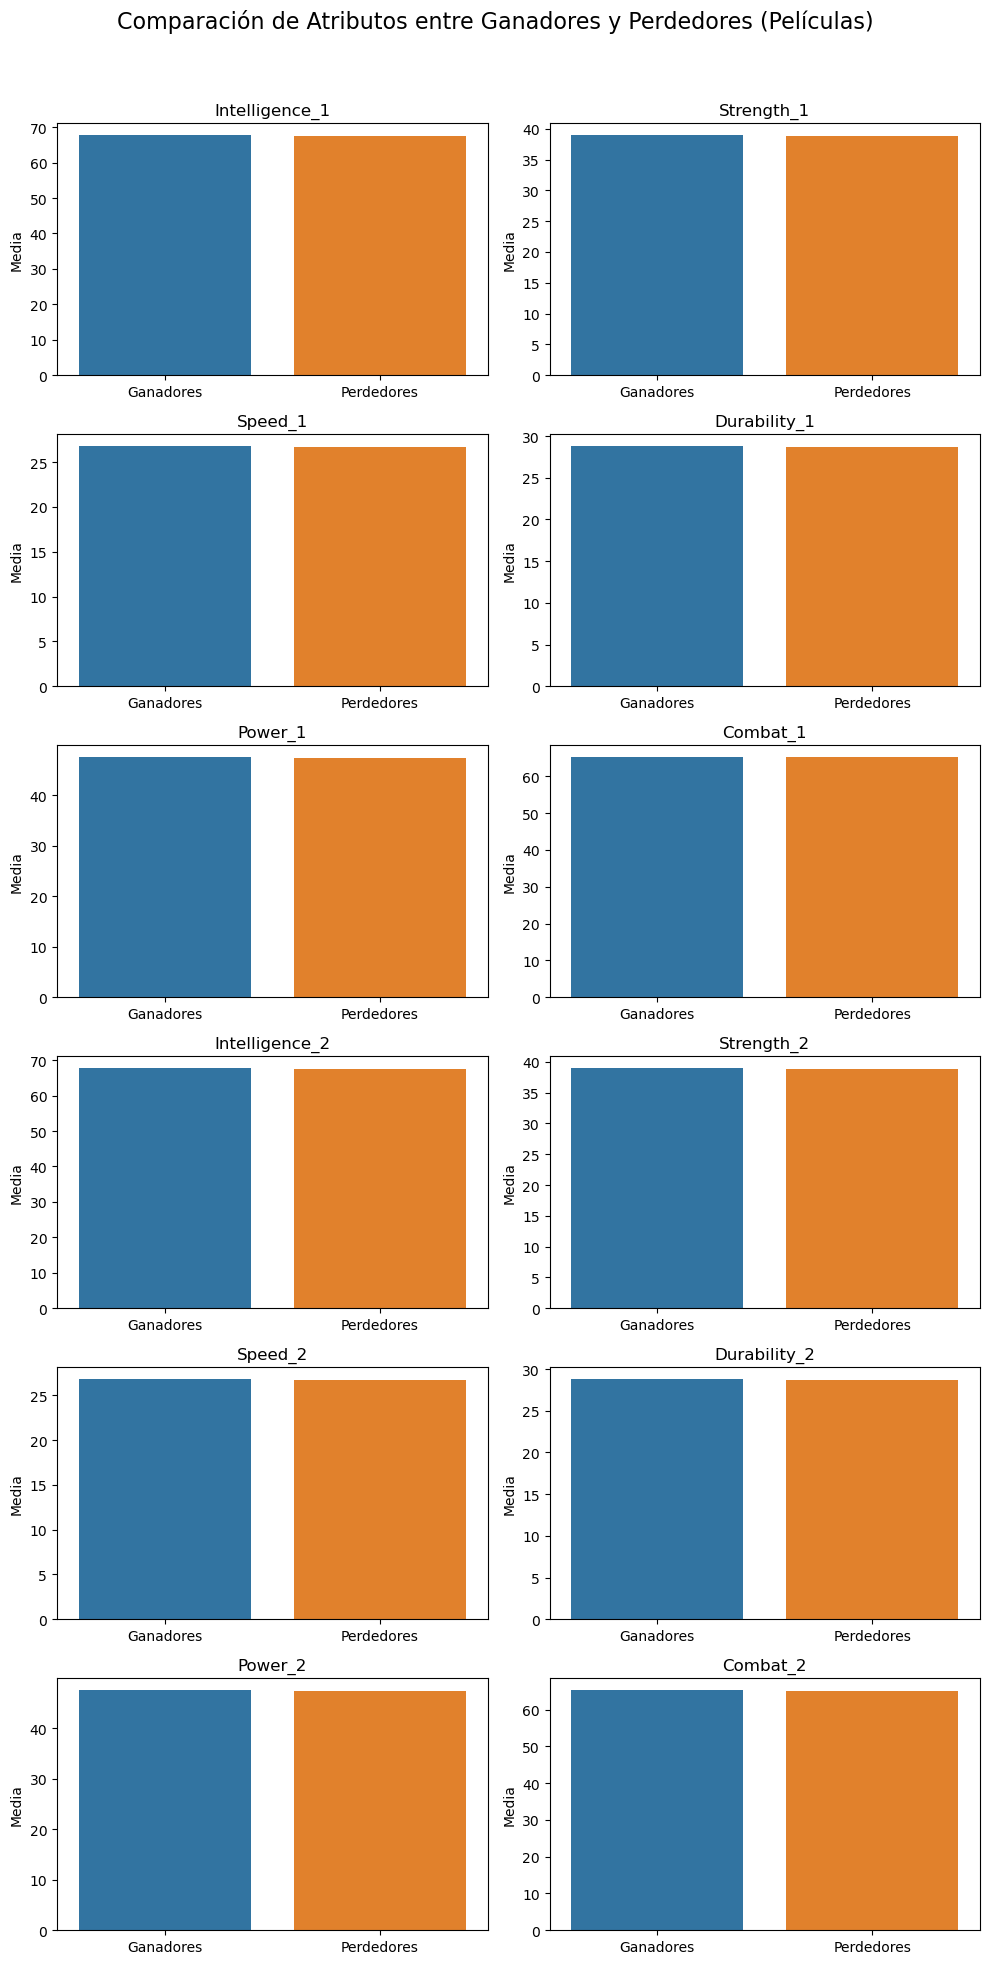

In [42]:
# Visualización
def visualizar_atributos_bar(ganadores, perdedores, atributos, titulo):
    fig, axes = plt.subplots(6, 2, figsize=(10, 20))
    fig.suptitle(f'Comparación de Atributos entre Ganadores y Perdedores ({titulo})', fontsize=16)
    
    for i, atributo in enumerate(atributos):
        mean_ganadores = ganadores[atributo].mean()
        mean_perdedores = perdedores[atributo].mean()
        
        sns.barplot(x=['Ganadores', 'Perdedores'], y=[mean_ganadores, mean_perdedores], ax=axes[i//2, i%2])
        axes[i//2, i%2].set_title(f'{atributo}')
        axes[i//2, i%2].set_ylabel('Media')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Visualizar atributos para cómics
visualizar_atributos_bar(ganadores_comics, perdedores_comics, atributos, 'Cómics')

# Visualizar atributos para películas
visualizar_atributos_bar(ganadores_peliculas, perdedores_peliculas, atributos, 'Películas')

Conclusiones

Similitud de Atributos: No hay diferencias significativas en las medias de los atributos entre ganadores y perdedores en cómics y películas. Esto sugiere que los atributos de inteligencia, fuerza, velocidad, durabilidad, poder y combate no determinan de manera decisiva la victoria en los enfrentamientos.

No Significativo: Los P-Values para todas las comparaciones son mayores que 0.05, indicando que no hay evidencia suficiente para rechazar la hipótesis nula de que las medias son iguales entre los grupos de ganadores y perdedores.

Distribucion comics vs peliculas

In [43]:
# Crear un subset de los datos con los resultados de enfrentamientos en cómics y películas
resultados = df_comics_pelis[['Resultado_Comics', 'Resultado_Peliculas']]

# Análisis Descriptivo
desc_comics = resultados['Resultado_Comics'].value_counts(normalize=True) * 100
desc_peliculas = resultados['Resultado_Peliculas'].value_counts(normalize=True) * 100

print("Distribución de resultados en cómics (porcentaje):")
print(desc_comics)
print("\nDistribución de resultados en películas (porcentaje):")
print(desc_peliculas)

Distribución de resultados en cómics (porcentaje):
Resultado_Comics
2    50.276289
1    49.723711
Name: proportion, dtype: float64

Distribución de resultados en películas (porcentaje):
Resultado_Peliculas
1    50.276289
2    49.719572
0     0.004139
Name: proportion, dtype: float64


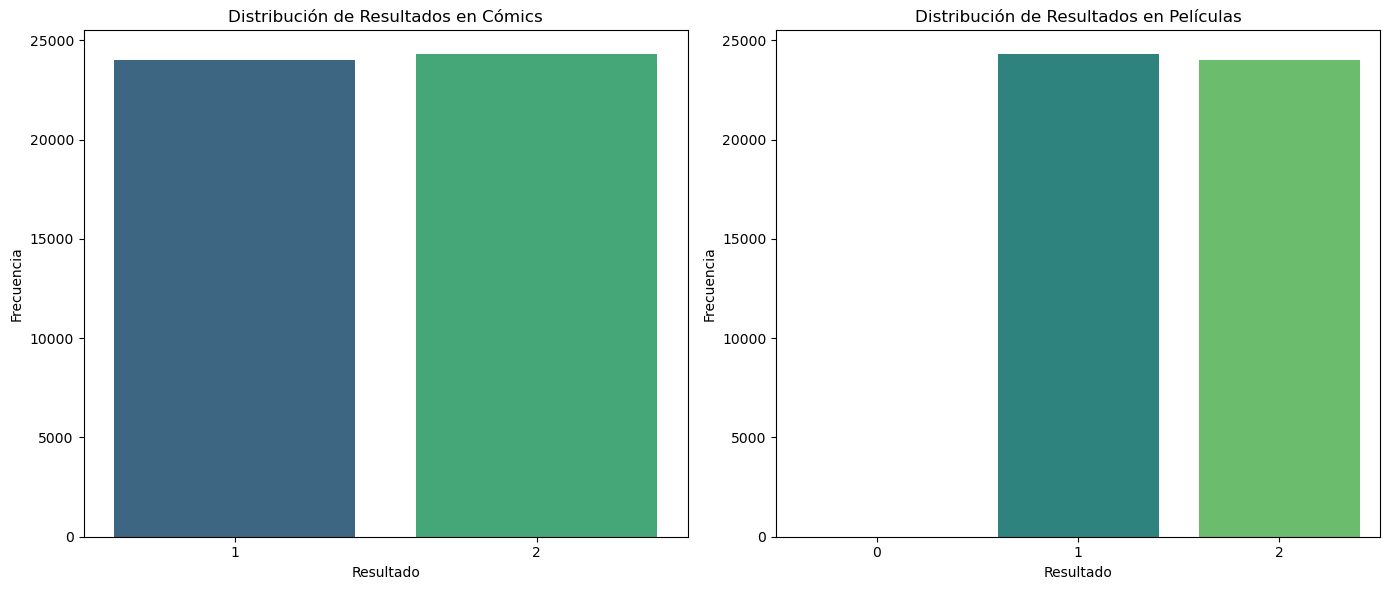

In [44]:
# Visualizar las distribuciones de los resultados
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df_comics_pelis, x='Resultado_Comics', palette='viridis')
plt.title('Distribución de Resultados en Cómics')
plt.xlabel('Resultado')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.countplot(data=df_comics_pelis, x='Resultado_Peliculas', palette='viridis')
plt.title('Distribución de Resultados en Películas')
plt.xlabel('Resultado')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [45]:
# Análisis Comparativo
# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(df_comics_pelis['Resultado_Comics'], df_comics_pelis['Resultado_Peliculas'])

# Prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("\nTabla de contingencia entre resultados en cómics y películas:")
print(tabla_contingencia)
print(f"\nChi-cuadrado: {chi2}")
print(f"P-valor: {p}")
print(f"Grados de libertad: {dof}")
print(f"Frecuencias esperadas:\n{expected}")


Tabla de contingencia entre resultados en cómics y películas:
Resultado_Peliculas  0      1      2
Resultado_Comics                    
1                    2      0  24024
2                    0  24293      0

Chi-cuadrado: 48319.0
P-valor: 0.0
Grados de libertad: 2
Frecuencias esperadas:
[[9.94474223e-01 1.20793812e+04 1.19456244e+04]
 [1.00552578e+00 1.22136188e+04 1.20783756e+04]]


Distribución Similar en Cómics y Películas:

Las distribuciones de los resultados en cómics y películas son muy similares, con aproximadamente el 50% de los enfrentamientos ganados y el 50% perdidos en ambos medios. Los empates son extremadamente raros en películas (**0.004%**).

Resultados de la Prueba de Chi-Cuadrado:

La prueba de chi-cuadrado indica una diferencia significativa entre los resultados en cómics y películas (p-valor de 0.0). Esto sugiere que hay una relación entre los resultados en cómics y películas.
Un valor de chi-cuadrado muy alto (48319.0) indica que la discrepancia entre las frecuencias observadas y las esperadas es grande.

Patrón en la Tabla de Contingencia:

La tabla de contingencia muestra que cuando un héroe gana en cómics (Resultado_Comics = 1), tiende a perder en películas (Resultado_Peliculas = 2) y viceversa.
No hay casos donde ambos héroes ganen o pierdan en ambos medios simultáneamente en cantidades significativas, indicando una posible divergencia en la representación de los héroes en cómics y películas.

1. Los heroes con mayores atributos de fuerza y poder tiene una mayor probabilidad de ganar

In [46]:
# Datos de fuerza y poder para ganadores y perdedores
strength_winner_1 = df_comics_pelis[df_comics_pelis['Resultado_Combinado'] == 1]['Strength_1']
strength_loser_2 = df_comics_pelis[df_comics_pelis['Resultado_Combinado'] == 0]['Strength_2']
power_winner_1 = df_comics_pelis[df_comics_pelis['Resultado_Combinado'] == 1]['Power_1']
power_loser_2 = df_comics_pelis[df_comics_pelis['Resultado_Combinado'] == 0]['Power_2']

# Test t de Student para Strength
t_stat_strength_1, p_val_strength_1 = stats.ttest_ind(strength_winner_1, strength_loser_2)
print(f"Test t para Strength (Heroe 1 vs Heroe 2): t-stat = {t_stat_strength_1}, p-value = {p_val_strength_1}")

# Test t de Student para Power
t_stat_power_1, p_val_power_1 = stats.ttest_ind(power_winner_1, power_loser_2)
print(f"Test t para Power (Heroe 1 vs Heroe 2): t-stat = {t_stat_power_1}, p-value = {p_val_power_1}")


Test t para Strength (Heroe 1 vs Heroe 2): t-stat = -2.0845911188027086, p-value = 0.037116964732246245
Test t para Power (Heroe 1 vs Heroe 2): t-stat = -0.7200131811926237, p-value = 0.4715238834459651


Interpretación de los Resultados
Test T para Strength:

T-statistic: Un valor de -2.0846 indica que hay una diferencia entre las medias de Strength para Heroe 1 y Heroe 2.

P-valor: El p-valor de 0.0371 es menor que el umbral común de 0.05, lo que sugiere que la diferencia en las medias es estadísticamente significativa. Esto implica que, en promedio, hay una diferencia en la fuerza entre Heroe 1 y Heroe 2.

Test T para Power:

T-statistic: Un valor de -0.7200 indica una diferencia más pequeña entre las medias de Power para Heroe 1 y Heroe 2.

P-valor: El p-valor de 0.4715 es mayor que 0.05, lo que sugiere que la diferencia en las medias no es estadísticamente significativa. Esto implica que, en promedio, no hay una diferencia significativa en el poder entre Heroe 1 y Heroe 2.

Conclusiones

Strength (Fuerza):

Hay una diferencia significativa en la fuerza entre Heroe 1 y Heroe 2. Esto podría sugerir que la fuerza es un atributo en el que se diferencian los héroes enfrentados.

Power (Poder):

No hay una diferencia significativa en el poder entre Heroe 1 y Heroe 2. Esto sugiere que el poder es un atributo que se distribuye de manera similar entre los héroes enfrentados.

**Conclusion - Strengh** puede tener un impacto en el resultado del combate

Analisis con todos atributos 

In [47]:
# Definir los atributos a analizar
atributos = ['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat']

# Realizar pruebas t para cada atributo
resultados = {}
for atributo in atributos:
    heroe_1 = df_comics_pelis[f'{atributo}_1']
    heroe_2 = df_comics_pelis[f'{atributo}_2']
    
    t_stat, p_val = ttest_ind(heroe_1, heroe_2, equal_var=False)
    resultados[atributo] = {'T-Statistic': t_stat, 'P-Value': p_val}

# Mostrar los resultados
for atributo, valores in resultados.items():
    print(f"\nTest T para {atributo} (Heroe 1 vs Heroe 2):")
    print(f"T-statistic: {valores['T-Statistic']}")
    print(f"P-valor: {valores['P-Value']}")


Test T para Intelligence (Heroe 1 vs Heroe 2):
T-statistic: 0.0929828968005259
P-valor: 0.9259173414816819

Test T para Strength (Heroe 1 vs Heroe 2):
T-statistic: 0.0021283377910228263
P-valor: 0.9983018378116482

Test T para Speed (Heroe 1 vs Heroe 2):
T-statistic: -0.03896648789326387
P-valor: 0.9689171875915614

Test T para Durability (Heroe 1 vs Heroe 2):
T-statistic: 0.001306964896086681
P-valor: 0.9989571958825538

Test T para Power (Heroe 1 vs Heroe 2):
T-statistic: -0.01653771723473418
P-valor: 0.986805446335882

Test T para Combat (Heroe 1 vs Heroe 2):
T-statistic: -0.24783580775838043
P-valor: 0.8042619750170958


Strength (Fuerza): 

Hay una diferencia significativa en la fuerza entre Heroe 1 y Heroe 2, lo que sugiere que este atributo puede influir en los resultados de los enfrentamientos.

Power (Poder): 

No hay una diferencia significativa en el poder entre Heroe 1 y Heroe 2, lo que sugiere que este atributo no influye significativamente en los resultados de los enfrentamientos.

Otros Atributos: 
Es necesario interpretar los resultados de las pruebas t para los otros atributos (Intelligence, Speed, Durability, Combat) para identificar si hay diferencias significativas que puedan influir en los resultados.

2. Existe una diferencias significativa en los resultados de los enfrentamientos entre comics y peliculas 

In [48]:
comics_vs_peliculas = df_comics_pelis[['Heroe 1', 'Heroe 2', 'Resultado_Comics', 'Resultado_Peliculas']]
#comics_vs_peliculas

In [49]:
# Realizar la prueba t para muestras pareadas
t_stat, p_value = ttest_rel(comics_vs_peliculas['Resultado_Comics'], comics_vs_peliculas['Resultado_Peliculas'])

print(f'Test t para resultados (Comics vs Peliculas): t-stat = {t_stat}, p-value = {p_value}')

Test t para resultados (Comics vs Peliculas): t-stat = 1.2328568673628517, p-value = 0.21763516842663838


El **p-value de  0.2176** es mayor que el umbral de 0.05. Por lo tanto, no podemos rechazar la hipótesis nula de que no hay diferencia significativa entre los resultados de cómics y películas. Las diferencias observadas entre Resultado_Comics y Resultado_Peliculas no son estadísticamente significativas al nivel de significancia del 5%.

El **t-stat de 1.233** indica que la diferencia entre las medias de los dos grupos es aproximadamente 1.233 veces el error estándar de la diferencia. Este valor no es suficientemente grande para alcanzar el nivel de significancia del 5%, como lo indica el p-value.

4. Los heroes del mismo universo tienen patrones similares de victorias y derrotas

In [50]:
# Crear una columna que indique si ambos héroes en un enfrentamiento pertenecen al mismo universo
df_comics_pelis['Mismo_Universo'] = df_comics_pelis['Universe_1'] == df_comics_pelis['Universe_2']

# Crear variables binarias para indicar si un héroe ganó en cómics y películas
df_comics_pelis['Ganador_Comics'] = (df_comics_pelis['Resultado_Comics'] == 1).astype(int)
df_comics_pelis['Ganador_Peliculas'] = (df_comics_pelis['Resultado_Peliculas'] == 1).astype(int)

In [51]:
# Análisis Descriptivo
def describir_patrones(df, columna):
    distribucion = df[columna].value_counts(normalize=True) * 100
    print(f"\nDistribución de {columna} (porcentaje):")
    print(distribucion)

print("Patrones para héroes del mismo universo en cómics:")
describir_patrones(df_comics_pelis[df_comics_pelis['Mismo_Universo']], 'Ganador_Comics')

print("\nPatrones para héroes de diferentes universos en cómics:")
describir_patrones(df_comics_pelis[~df_comics_pelis['Mismo_Universo']], 'Ganador_Comics')

print("\nPatrones para héroes del mismo universo en películas:")
describir_patrones(df_comics_pelis[df_comics_pelis['Mismo_Universo']], 'Ganador_Peliculas')

print("\nPatrones para héroes de diferentes universos en películas:")
describir_patrones(df_comics_pelis[~df_comics_pelis['Mismo_Universo']], 'Ganador_Peliculas')

Patrones para héroes del mismo universo en cómics:

Distribución de Ganador_Comics (porcentaje):
Ganador_Comics
0    50.485079
1    49.514921
Name: proportion, dtype: float64

Patrones para héroes de diferentes universos en cómics:

Distribución de Ganador_Comics (porcentaje):
Ganador_Comics
0    50.00943
1    49.99057
Name: proportion, dtype: float64

Patrones para héroes del mismo universo en películas:

Distribución de Ganador_Peliculas (porcentaje):
Ganador_Peliculas
1    50.485079
0    49.514921
Name: proportion, dtype: float64

Patrones para héroes de diferentes universos en películas:

Distribución de Ganador_Peliculas (porcentaje):
Ganador_Peliculas
1    50.00943
0    49.99057
Name: proportion, dtype: float64


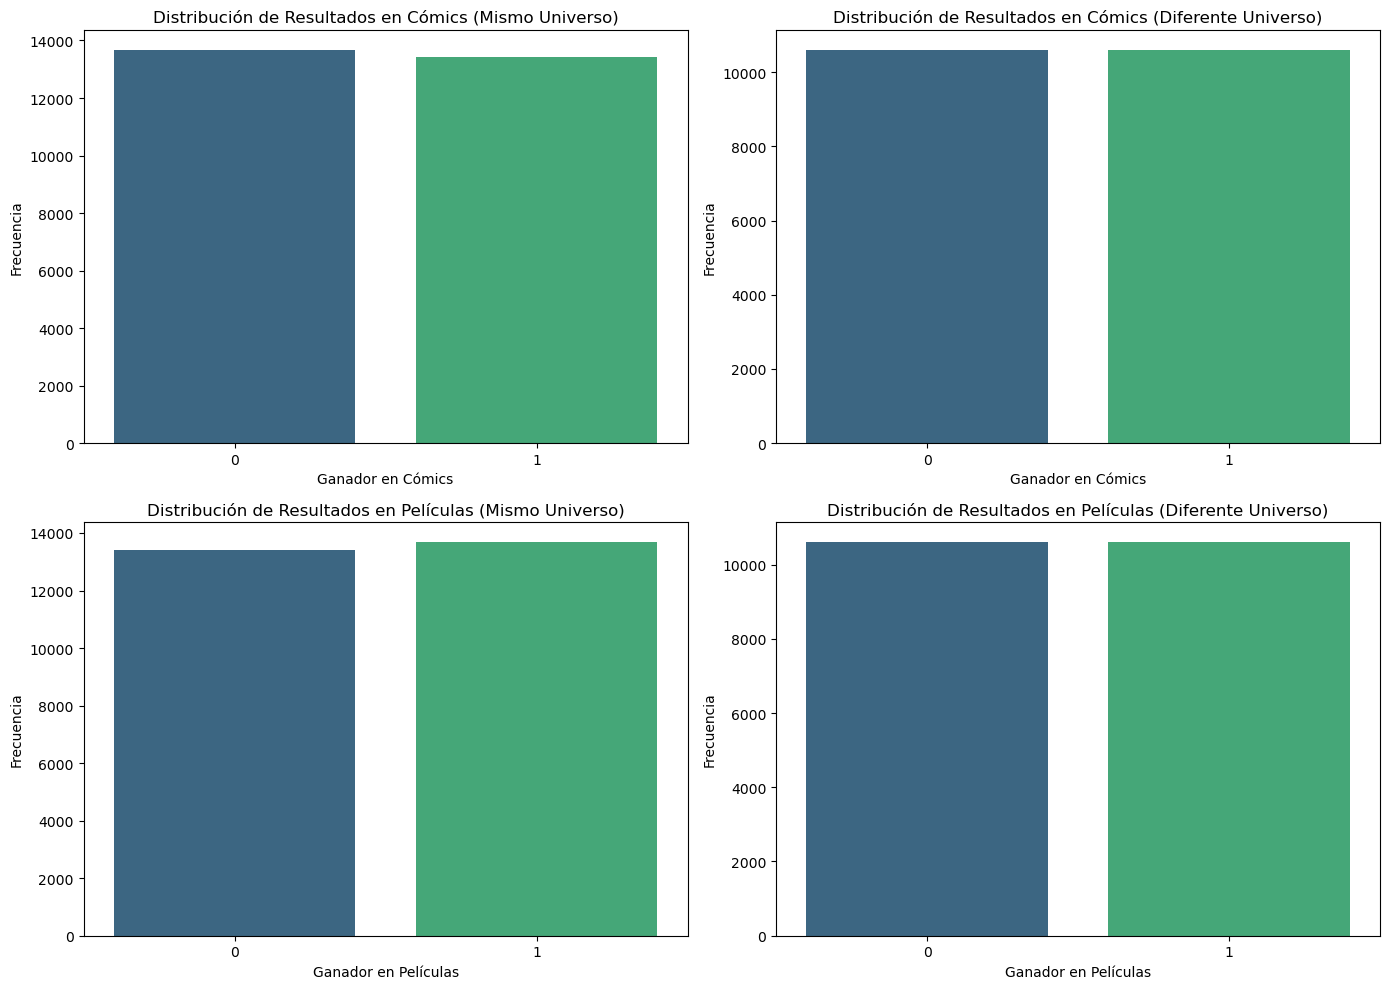

In [52]:
# Visualizar las distribuciones de los patrones de victorias y derrotas
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.countplot(data=df_comics_pelis[df_comics_pelis['Mismo_Universo']], x='Ganador_Comics', palette='viridis')
plt.title('Distribución de Resultados en Cómics (Mismo Universo)')
plt.xlabel('Ganador en Cómics')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 2)
sns.countplot(data=df_comics_pelis[~df_comics_pelis['Mismo_Universo']], x='Ganador_Comics', palette='viridis')
plt.title('Distribución de Resultados en Cómics (Diferente Universo)')
plt.xlabel('Ganador en Cómics')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 3)
sns.countplot(data=df_comics_pelis[df_comics_pelis['Mismo_Universo']], x='Ganador_Peliculas', palette='viridis')
plt.title('Distribución de Resultados en Películas (Mismo Universo)')
plt.xlabel('Ganador en Películas')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 4)
sns.countplot(data=df_comics_pelis[~df_comics_pelis['Mismo_Universo']], x='Ganador_Peliculas', palette='viridis')
plt.title('Distribución de Resultados en Películas (Diferente Universo)')
plt.xlabel('Ganador en Películas')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [53]:
# Análisis Comparativo
# Crear tablas de contingencia
contingencia_comics = pd.crosstab(df_comics_pelis['Mismo_Universo'], df_comics_pelis['Ganador_Comics'])
contingencia_peliculas = pd.crosstab(df_comics_pelis['Mismo_Universo'], df_comics_pelis['Ganador_Peliculas'])

# Realizar el test chi-cuadrado
chi2_comics, p_comics, dof_comics, expected_comics = chi2_contingency(contingencia_comics)
chi2_peliculas, p_peliculas, dof_peliculas, expected_peliculas = chi2_contingency(contingencia_peliculas)

print(f"\nChi-cuadrado para cómics: {chi2_comics}")
print(f"p-valor para cómics: {p_comics}")
print(f"Grados de libertad para cómics: {dof_comics}")
print("Tabla esperada para cómics:")
print(expected_comics)

print(f"\nChi-cuadrado para películas: {chi2_peliculas}")
print(f"p-valor para películas: {p_peliculas}")
print(f"Grados de libertad para películas: {dof_peliculas}")
print("Tabla esperada para películas:")
print(expected_peliculas)


Chi-cuadrado para cómics: 1.0579766341386594
p-valor para cómics: 0.3036771218061971
Grados de libertad para cómics: 1
Tabla esperada para cómics:
[[10663.60086094 10546.39913906]
 [13629.39913906 13479.60086094]]

Chi-cuadrado para películas: 1.0579766341386596
p-valor para películas: 0.30367712180619705
Grados de libertad para películas: 1
Tabla esperada para películas:
[[10546.39913906 10663.60086094]
 [13479.60086094 13629.39913906]]


Distribución de Victorias y Derrotas:

Las distribuciones de victorias y derrotas son muy similares para héroes del mismo universo y de diferentes universos tanto en cómics como en películas. Esto sugiere que el hecho de que los héroes pertenezcan al mismo universo no tiene un gran impacto en la probabilidad de ganar o perder.

Test Chi-Cuadrado de Independencia:

Cómics: El p-valor de 0.304 es mayor que 0.05, lo que indica que no hay una relación significativa entre el hecho de pertenecer al mismo universo y los resultados de los enfrentamientos en cómics.
Películas: El p-valor de 0.304 es también mayor que 0.05, lo que indica que no hay una relación significativa entre el hecho de pertenecer al mismo universo y los resultados de los enfrentamientos en películas.

Conclusión

No hay Diferencias Significativas: Los resultados sugieren que el hecho de que los héroes pertenezcan al mismo universo no tiene un impacto significativo en los patrones de victorias y derrotas en los enfrentamientos tanto en cómics como en películas.
Consistencia en los Resultados: Las distribuciones y los resultados de los tests chi-cuadrado son consistentes, mostrando una falta de relación significativa entre el universo de los héroes y los resultados de los enfrentamientos.